In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(30)

,age,sex,bmi,children,smoker,region,charges
1308,25,female,30.200,0,yes,southwest,33900.65300
1309,41,male,32.200,2,no,southwest,6875.96100
1310,42,male,26.315,1,no,northwest,6940.90985
1311,33,female,26.695,0,no,northwest,4571.41305
1312,34,male,42.900,1,no,southwest,4536.25900
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270


EDA

In [5]:
df.shape

(1338, 7)

There 1338 rows and 7 columns

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As we can see there are no null values in the data

In [10]:
df.isnull().sum().sum()

0

<AxesSubplot:>

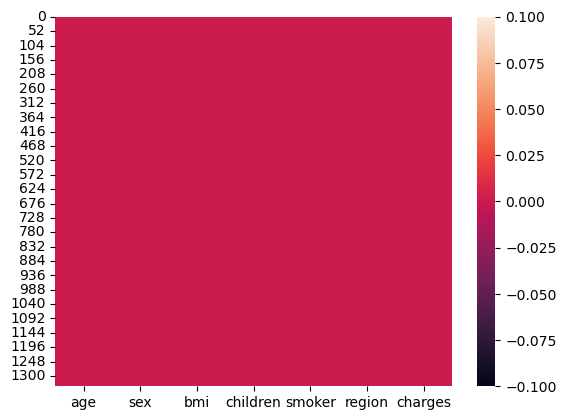

In [11]:
sns.heatmap(df.isnull())

In [12]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns:",categorical_col)
print("\n")

#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Categorical Columns: ['sex', 'smoker', 'region']


Numerical Columns: ['age', 'bmi', 'children', 'charges']


In [13]:
list:categorical_col

In [14]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. the count of the columns are the same which means there are no missing values in the dataset
2.the mean value is greater than median so we can say the data is skewed to the right
3.there is significant difference in the 75% and max data.

UNIVARIATE ANALYSIS

<AxesSubplot:>

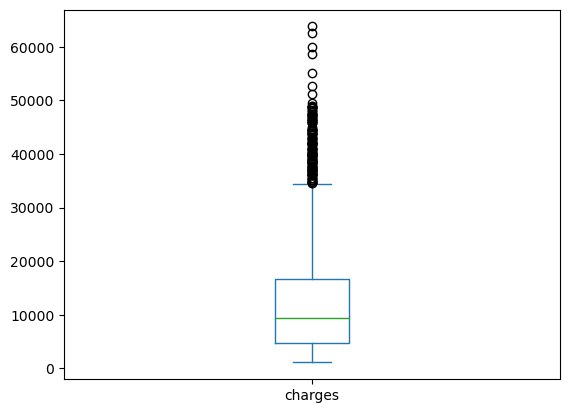

In [17]:
df['charges'].plot.box()

most of the charges are around 35.5.

<AxesSubplot:>

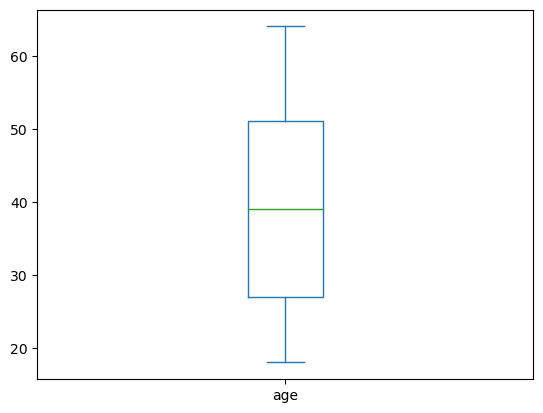

In [20]:
df['age'].plot.box()

most people are above the age of 50

male      676
female    662
Name: sex, dtype: int64


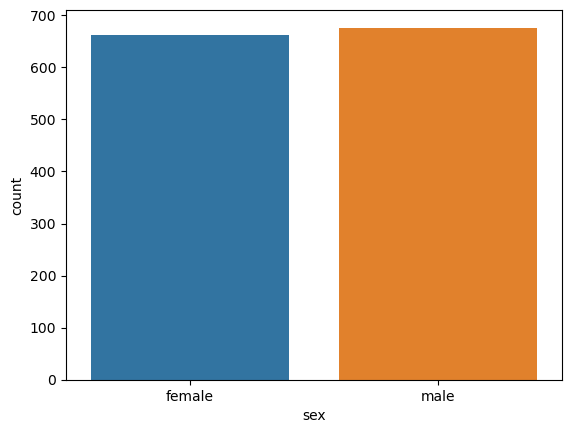

In [21]:
print(df['sex'].value_counts())
ax=sns.countplot(x='sex',data=df)
plt.show()

male members are relatively more than the female

<AxesSubplot:>

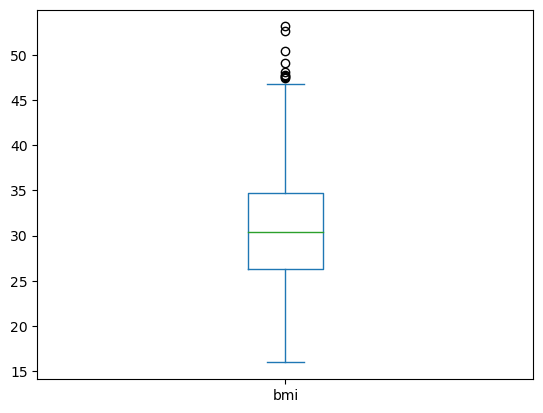

In [22]:
df['bmi'].plot.box()

maximum bmi is above 45 and the column has outliers

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


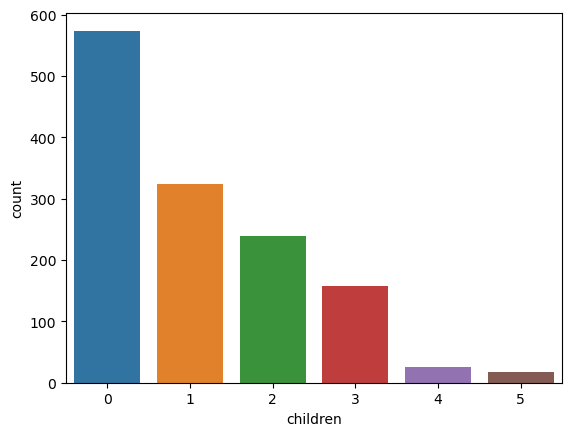

In [23]:
print(df['children'].value_counts())
ax=sns.countplot(x='children',data=df)
plt.show()

most members are with no children followed by 1,2,3,4 and 5

no     1064
yes     274
Name: smoker, dtype: int64


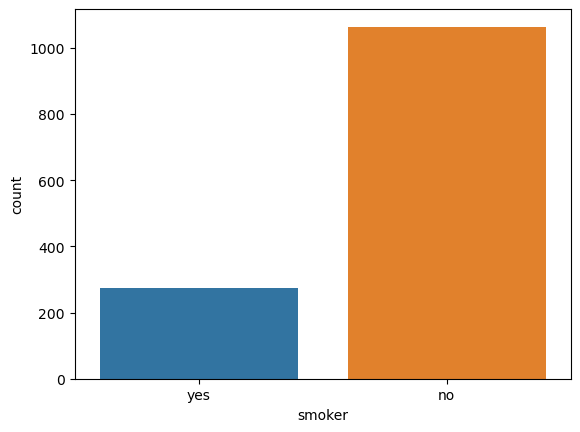

In [24]:
print(df['smoker'].value_counts())
ax=sns.countplot(x='smoker',data=df)
plt.show()

most members are non smokers

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


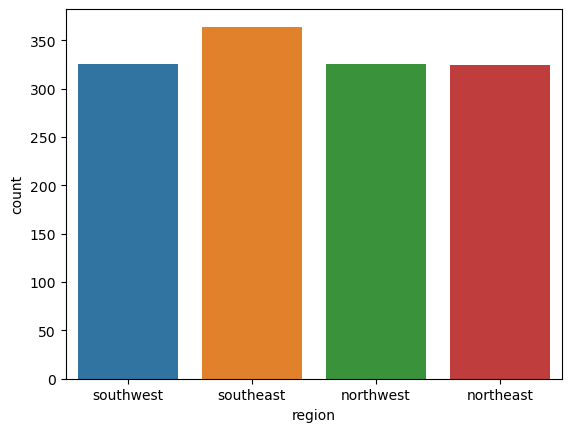

In [25]:
print(df['region'].value_counts())
ax=sns.countplot(x='region',data=df)
plt.show()

most members are from southeast region

bivariate analysis

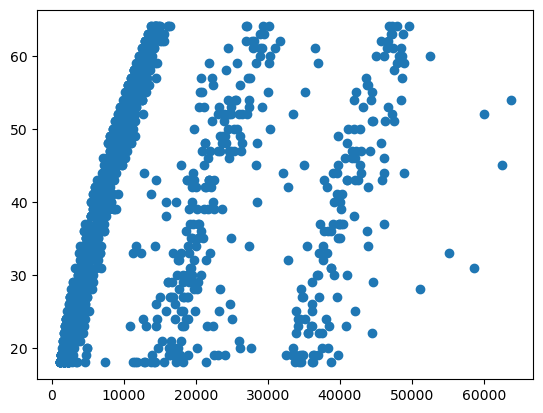

In [27]:
plt.scatter(df['charges'],df['age'])

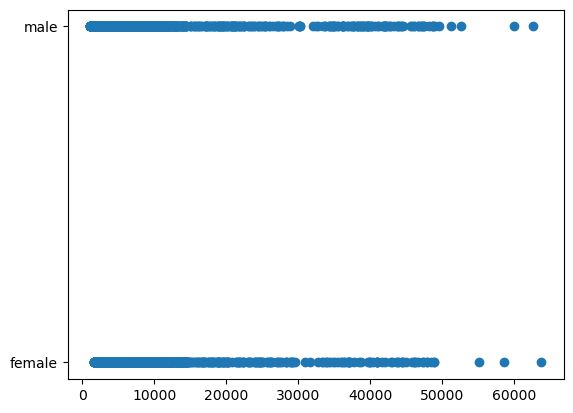

In [28]:
plt.scatter(df['charges'],df['sex'])

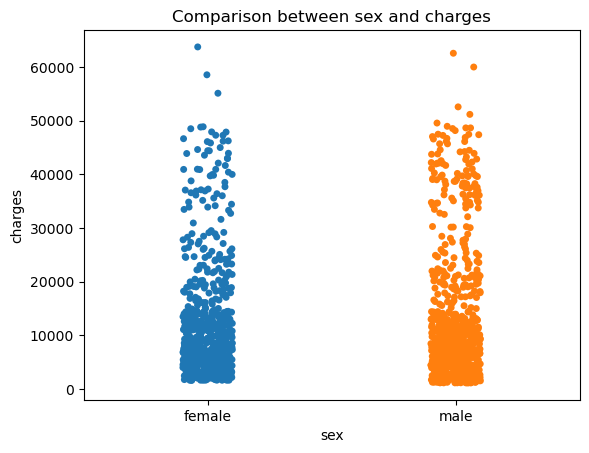

In [29]:
plt.title("Comparison between sex and charges")
sns.stripplot(x="sex",y="charges", data=df)
plt.show()

both male and female are equally paying the charge

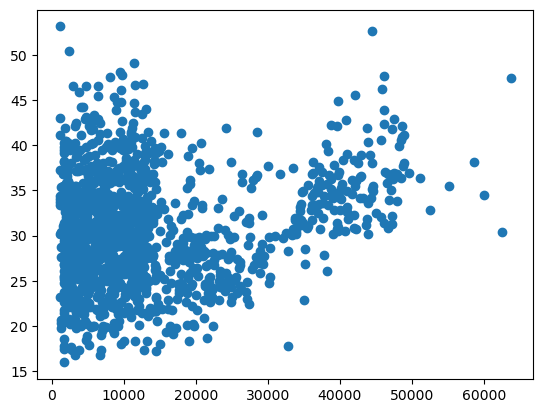

In [30]:
plt.scatter(df['charges'],df['bmi'])

charges increase a bit with increase of bmi

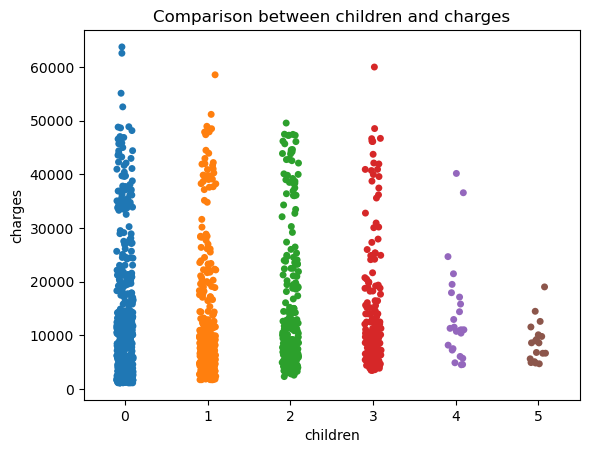

In [31]:
plt.title("Comparison between children and charges")
sns.stripplot(x="children",y="charges", data=df)
plt.show()

with 0 number of children the charges are more compared to more number of children

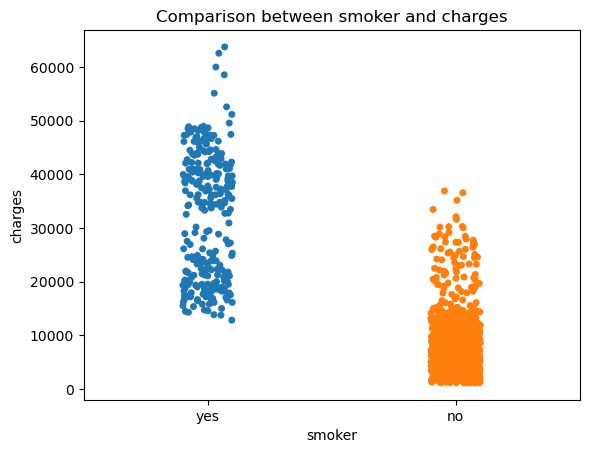

In [32]:
plt.title("Comparison between smoker and charges")
sns.stripplot(x="smoker",y="charges", data=df)
plt.show()

the charges are high if the member is a smoker

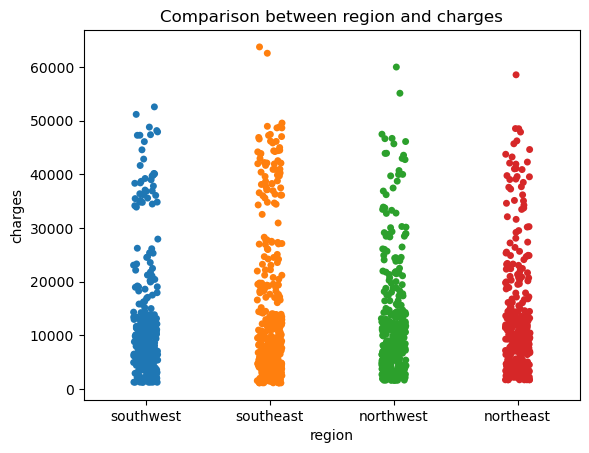

In [33]:
plt.title("Comparison between region and charges")
sns.stripplot(x="region",y="charges", data=df)
plt.show()

charges are high with the southwest region

multivariate analysis

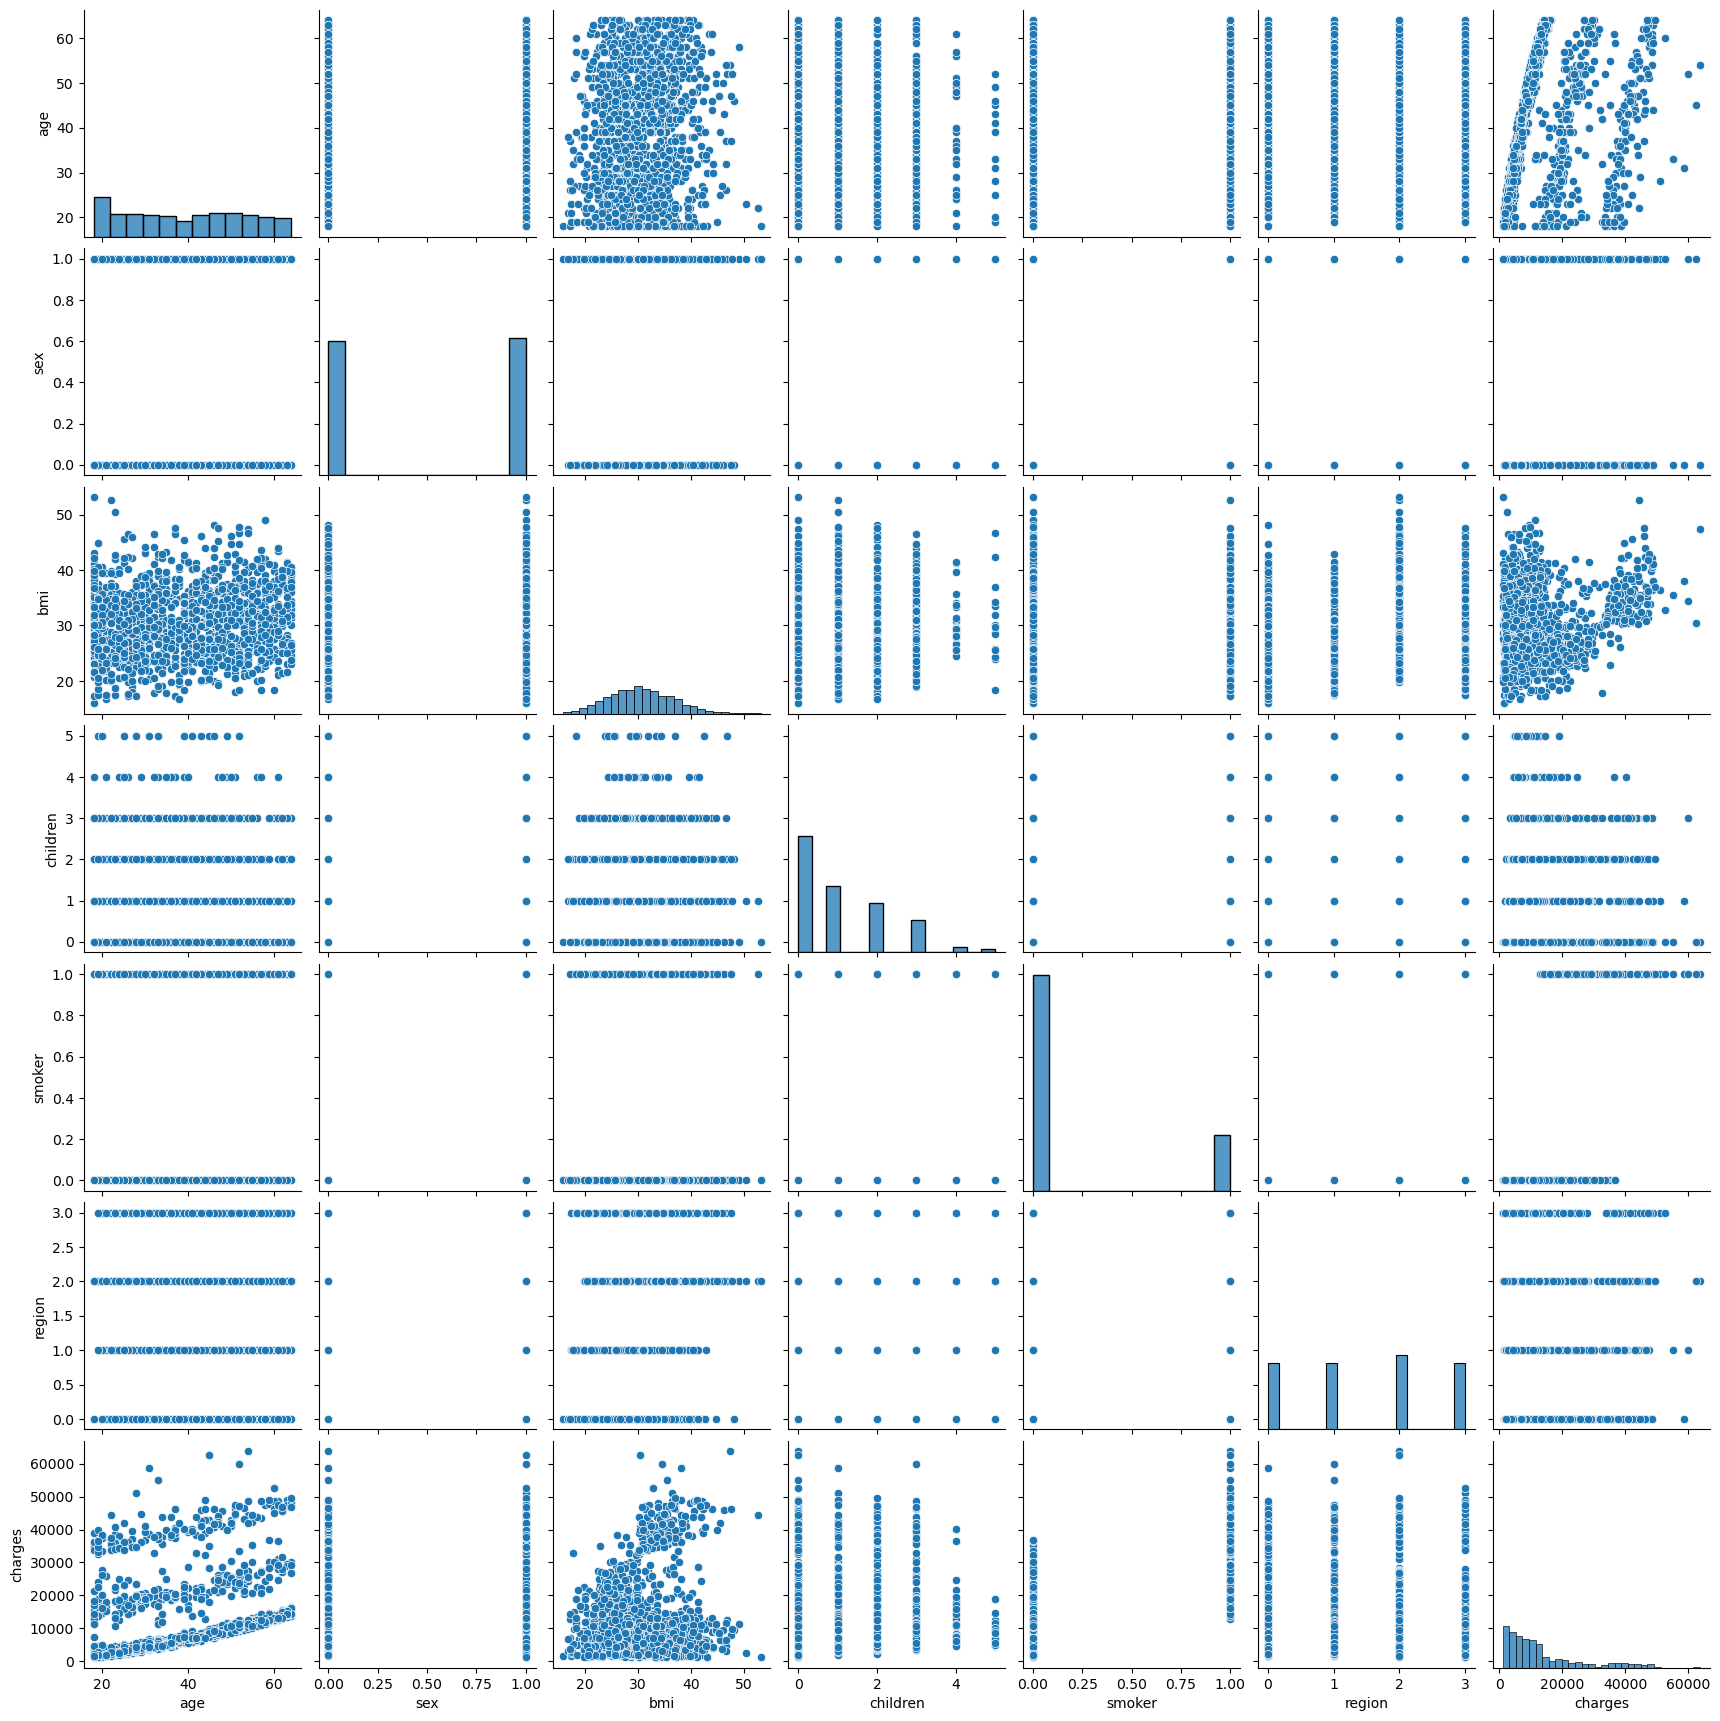

In [39]:
sns.pairplot(df)

REMOVING OUTLIERS

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [41]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [44]:
df.shape

(1338, 7)

In [45]:
df_new.shape

(1309, 7)

As we can see we have removed the outliers

CHECKING FOR SKEWNESS

In [74]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [75]:
df_new.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [76]:
df_new['smoker']=np.cbrt(df['smoker'])

encoding the categorical data

In [78]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   float64
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   int64  
 4   smoker    1309 non-null   float64
 5   region    1309 non-null   float64
 6   charges   1309 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 81.8 KB


In [79]:
df_new.describe()

,age,sex,bmi,children,smoker,region,charges
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,0.502674,30.584037,1.045073,0.202445,1.505730,13089.622269
std,14.085397,0.500184,5.975320,1.124627,0.401975,1.105037,11738.168486
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4686.388700
50%,39.000000,1.000000,30.305000,1.000000,0.000000,2.000000,9377.904700
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,49577.662400


after encoding the categorical data the total number of rows are the same

In [80]:
cor=df_new.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.059455
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.191453
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.100438
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.191453,0.100438,0.785129,-0.007633,1.000000


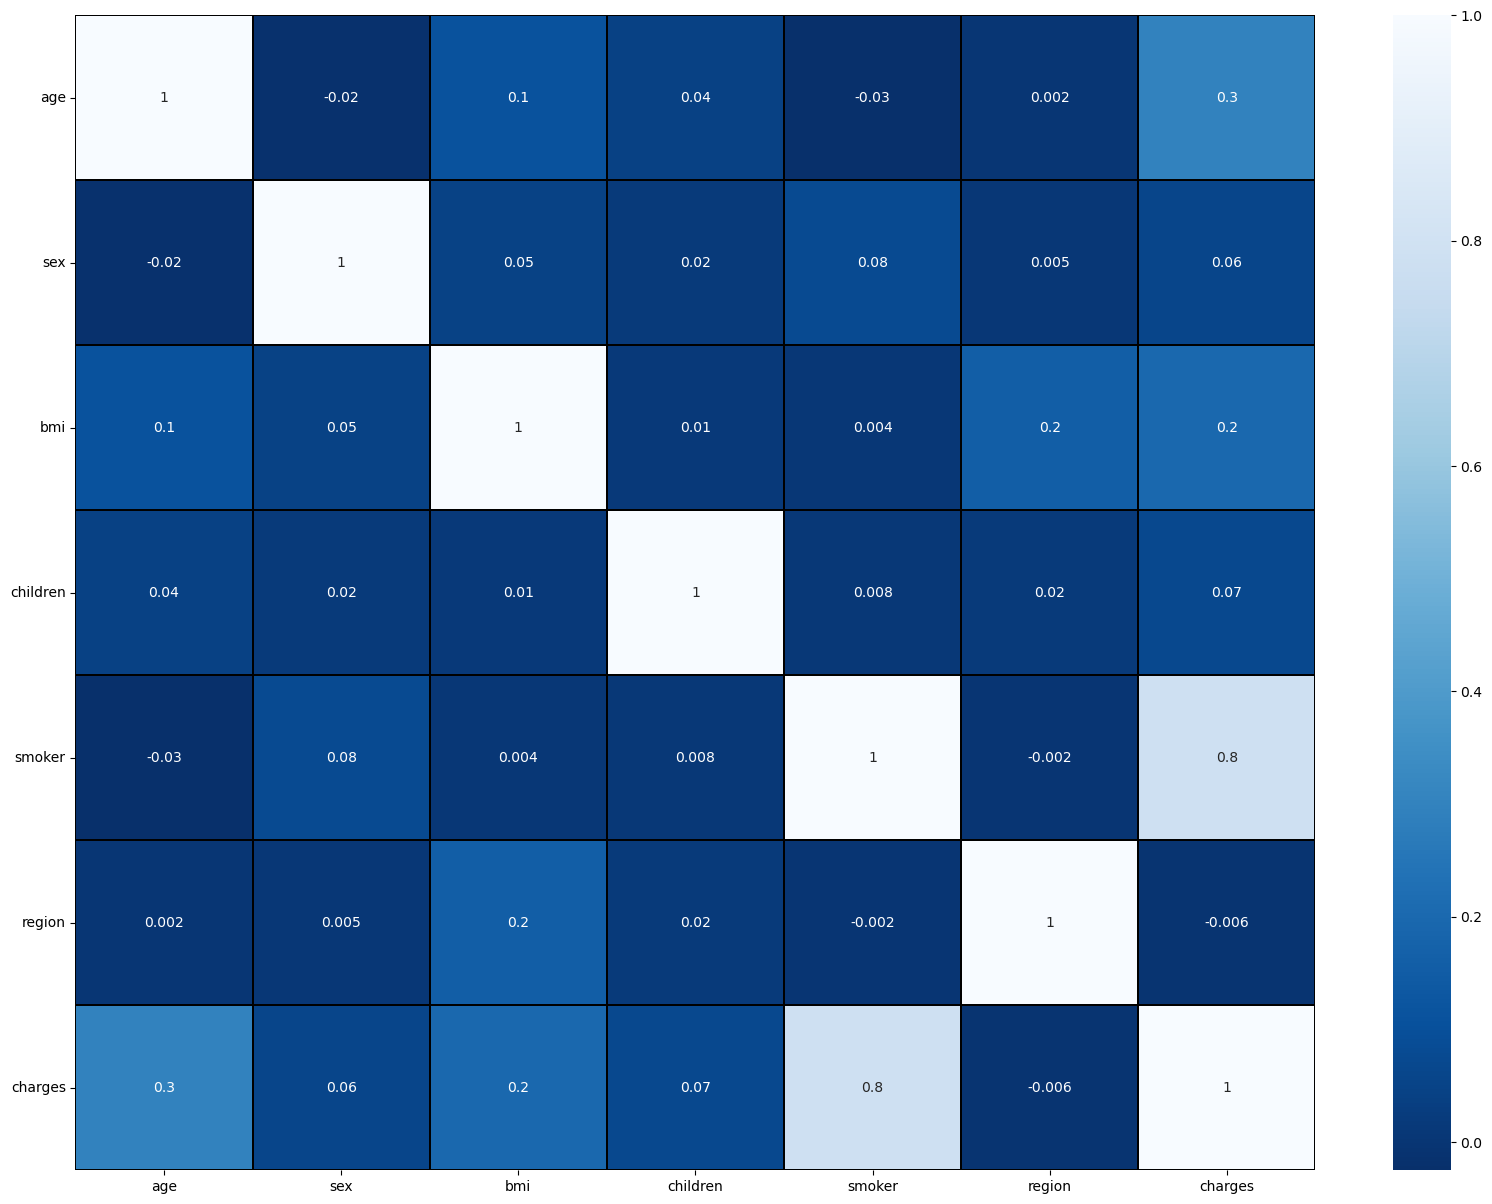

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidth=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

smoker, age and sex are highly correlated
region is negatively correlated to target charges whearas others are positively correlated

In [82]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.785129
age         0.305263
bmi         0.191453
children    0.100438
sex         0.059455
region     -0.007633
Name: charges, dtype: float64

In [83]:
x=df_new.drop('charges',axis=1)
y=df_new['charges']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Feature']=x.columns
vif

,VIF values,Feature
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region


no major difference in VIF of all columns

In [86]:
y.value_counts()

1639.56310     2
16884.92400    1
13555.00490    1
10422.91665    1
7243.81360     1
              ..
28287.89766    1
1149.39590     1
37079.37200    1
4738.26820     1
29141.36030    1
Name: charges, Length: 1308, dtype: int64

the data is balanced

modelling

In [87]:
df_new['charges'].round(2)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1309, dtype: float64

In [88]:
df_new['bmi'].round(2)

0       27.90
1       33.77
2       33.00
3       22.70
4       28.88
        ...  
1333    30.97
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 1309, dtype: float64

In [89]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

ValueError: Unknown label type: 'continuous'

In [69]:
y.value_counts()

1639.56310     2
16884.92400    1
13555.00490    1
10422.91665    1
7243.81360     1
              ..
28287.89766    1
1149.39590     1
37079.37200    1
4738.26820     1
29141.36030    1
Name: charges, Length: 1308, dtype: int64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [65]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [73]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

ValueError: Unknown label type: 'continuous'

In [ ]:
coudnt do further as it showing this earror